## Random Pattern Matching Algorithm

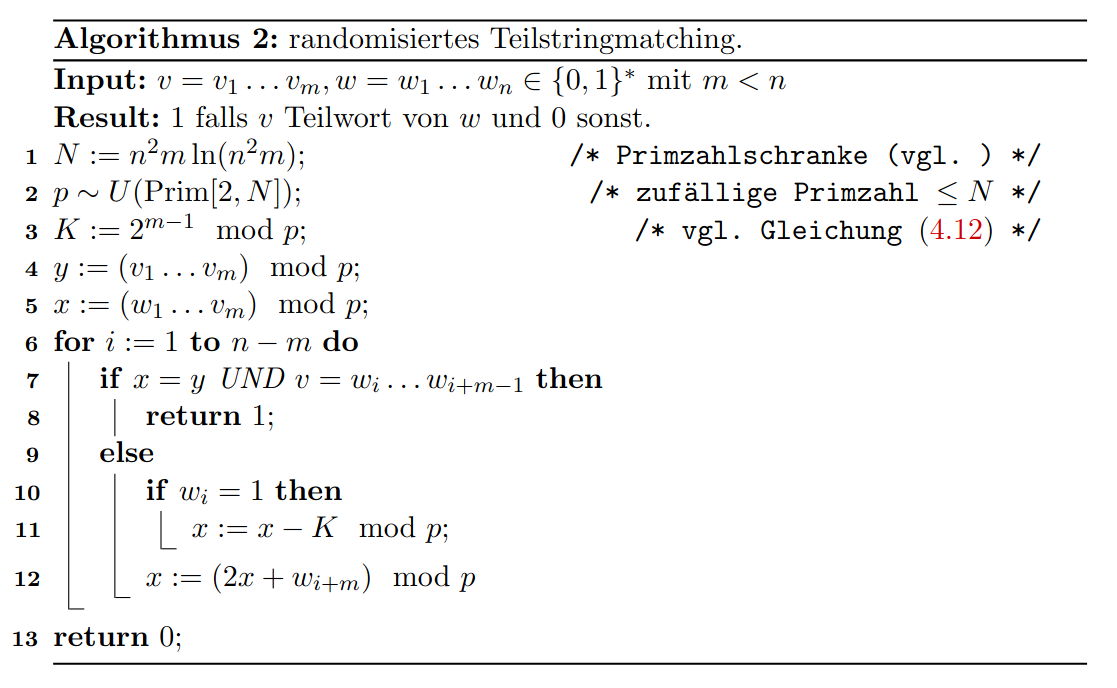

In [1]:
import math
import numpy as np
import pandas as pd
import pdb
import time
import sys
from random import randint,getrandbits
sys.path.insert(0,'/home/paulbrenker/PycharmProjects/asa')
import suffix_tree as st

In [2]:
def binary(e):
    return bin(e)[2:]

def modexp(m, e, n):
    s=1
    for b in binary(e):
        s=s*s % n
        #pdb.set_trace()
        if b=="1":
            s=s*m % n
            #pdb.set_trace()
    return s

def isCompositeSimpleFermat(n):
    '''
    Returns true if n is definitely composite.
    If returns false, then n is a prime number with a high probability.
    '''
    return modexp(2, n-1, n) != 1

def isComposite(n):
    return isCompositeSimpleFermat(n)

def generateProbablePrim(n):
    while True:
        x=randint(0,n)
        if not isComposite(x) :
            return x

### Algorithm

In [3]:
def random_pattern_match(v: str, w: str, ret = 'lazy') -> bool:
    n = len(w)
    m = len(v)
    N = n**2 * m * int(math.log(n**2 * m))
    p = generateProbablePrim(N)
    K = 2**(m-1)
    y = int(v, base=2) % p
    x = int(w[:m], base=2)
    res = []
    for i in range(n-m):
        if (x == y) and (v == w[i:i+m]):
            if ret == 'lazy': return i
            elif ret == 'bool': return True
        if w[i] == '1':
            x = (x - K) % p
        x = (2 * x + int(w[i + m], base=2)) % p
    if ret == 'lazy': return -1
    elif ret == 'bool': return False
    else: raise ValueError('return argument must be one of: \'lazy\'or \'bool\'')

In [4]:
print(random_pattern_match('11','010100101010111'))
print(random_pattern_match('1111','010100101010111'))

12
-1


### Boyer Moore Algorithm
copied from: https://gist.github.com/dbrgn/1154006, extended algorithms for more detailed return value options

In [5]:
class last_occurrence(object):
    """Last occurrence functor."""

    def __init__(self, pattern, alphabet):
        """Generate a dictionary with the last occurrence of each alphabet
        letter inside the pattern.
        
        Note: This function uses str.rfind, which already is a pattern
        matching algorithm. There are more 'basic' ways to generate this
        dictionary."""
        self.occurrences = dict()
        for letter in alphabet:
            self.occurrences[letter] = pattern.rfind(letter)

    def __call__(self, letter):
        """Return last position of the specified letter inside the pattern.
        Return -1 if letter not found in pattern."""
        return self.occurrences[letter]


def boyer_moore_match(text, pattern, ret ='lazy'):
    """Find occurrence of pattern in text."""
    alphabet = set(text)
    last = last_occurrence(pattern, alphabet)
    res = []
    m = len(pattern)
    n = len(text)
    i = m - 1  # text index
    j = m - 1  # pattern index
    while i < n:
        if text[i] == pattern[j]:
            if j == 0:
                if ret == 'lazy': return i
                elif ret == 'bool': return True
            else:
                i -= 1
                j -= 1
        else:
            l = last(text[i])
            i = i + m - min(j, 1+l)
            j = m - 1 
    if ret == 'lazy': return -1
    elif ret == 'bool': return False
    else: raise ValueError('return argument must be one of: \'lazy\'or \'bool\'')

### Analysis

In [6]:
def generate_random_bitstrings(len_v, len_w): # |v| < |w|
    v = ''
    w = ''
    for m in range(len_v) : v += str(getrandbits(1))
    for n in range(len_w) : w += str(getrandbits(1))
    return v, w

In [7]:
test_data = []

In [8]:
'''
    CAREFUL SUFFIX TREE WILL USE A LOT OF RAM... CAN CAUSE KERNEL TO DIE
'''
LEN_TEXT = 100000
LEN_PATTERN = 20
for i in range(1):
    pattern, text = generate_random_bitstrings(LEN_PATTERN, LEN_TEXT)
    rd_match_time = time.time()
    rd_match = random_pattern_match(pattern, text,ret='bool')
    rd_match_time = time.time() - rd_match_time
    bm_match_time = time.time()
    bm_match = boyer_moore_match(text, pattern,ret = 'bool')
    bm_match_time = time.time() - bm_match_time
    s = st.SuffixTree(text)
    st_match_time = time.time()
    u = s.search(pattern)
    if u == []: u = False
    else: u = True
    st_match_time = time.time() - st_match_time
    test_data.append((rd_match, round(rd_match_time,5), bm_match, round(bm_match_time, 5), u, st_match_time))

In [9]:
df = pd.DataFrame(data = test_data, columns = ['Result Random Algorithm', 'Random Algorithm Execution Time', 'Result Boyer Moore', 'Boyer Moore Execution Time', 'Suffix Tree Search Result', 'Suffix Tree Search Runtime'])
df

,Result Random Algorithm,Random Algorithm Execution Time,Result Boyer Moore,Boyer Moore Execution Time,Suffix Tree Search Result,Suffix Tree Search Runtime
0,False,0.02952,False,0.02783,False,0.000041
